# Part 1 - Vsualize COVID-19 Deaths

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The csv file is taken from National Center for Health Statistics:

- https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm

accessed Oct 16, 2020

In [2]:
df = pd.read_csv('Data/weekly_deaths.csv')

In [3]:
df.head()

,Week Ending Date,State,Observed Number,Upper Bound Threshold,Exceeds Threshold,Average Expected Count,Excess Lower Estimate,Excess Higher Estimate,Year,Total Excess Lower Estimate in 2020,Total Excess Higher Estimate in 2020,Percent Excess Lower Estimate,Percent Excess Higher Estimate,Type,Outcome,Suppress,Note
0,1/14/2017,Alabama,1130.0,1199.0,False,1042.0,0.0,88.0,2017,3533,5472,0.0,0.1,Predicted (weighted),All causes,NaN,NaN
1,1/21/2017,Alabama,1048.0,1214.0,False,1057.0,0.0,0.0,2017,3533,5472,0.0,0.0,Predicted (weighted),All causes,NaN,NaN
2,1/28/2017,Alabama,1026.0,1233.0,False,1076.0,0.0,0.0,2017,3533,5472,0.0,0.0,Predicted (weighted),All causes,NaN,NaN
3,2/4/2017,Alabama,1036.0,1231.0,False,1074.0,0.0,0.0,2017,3533,5472,0.0,0.0,Predicted (weighted),All causes,NaN,NaN
4,2/11/2017,Alabama,1058.0,1224.0,False,1071.0,0.0,0.0,2017,3533,5472,0.0,0.0,Predicted (weighted),All causes,NaN,NaN


In [4]:
# Get 2020 data
df = df[df['Year']==2020]

In [5]:
# There are two types of deaths. We are only intereseted in weighted deaths
df = df[df['Type']=='Predicted (weighted)']

In [6]:
def function(row):
    if row['Week Ending Date'][0] == '2':
        return 'Feb'
    if row['Week Ending Date'][0] == '3':
        return 'March'
    if row['Week Ending Date'][0] == '4':
        return 'April'
    elif row['Week Ending Date'][0] == '5':
        return 'May'
    elif row['Week Ending Date'][0] == '6':
        return 'June'
    elif row['Week Ending Date'][0] == '7':
        return 'July'
    elif row['Week Ending Date'][0] == '8':
        return 'August'
    elif row['Week Ending Date'][0] == '9':
        return 'September'
    else:
        return 'NaN'

In [7]:
# Classify the weeks by months by using week ending date
df['Month'] = df.apply(function, axis=1)

In [8]:
# Get national data
df = df[df['State']=='United States']

In [9]:
# Separate dataframe based on all casuses or death causes excluding COVID-19
all_case = df['Outcome'] == 'All causes'
no_covid = df['Outcome'] == 'All causes, excluding COVID-19'

all_df = df[all_case]
nocovid_df = df[no_covid]

In [10]:
# Get montly death counts
month = ['Feb','March','April', 'May', 'June', 'July', 'August', 'September']

deaths = []

for i in month:
    data = all_df[all_df['Month']== i]
    deaths.append(np.sum(data['Observed Number']))

In [11]:
no_covid = []

for i in month:
    data = nocovid_df[nocovid_df['Month']== i]
    no_covid.append(np.sum(data['Observed Number']))

In [12]:
# Get covid-19 death counts
deaths = np.array(deaths)
no_covid = np.array(no_covid)
covid = deaths - no_covid

In [13]:
percentage = covid / deaths

In [14]:
percentage

array([5.42363689e-05, 1.59294908e-02, 1.94804077e-01, 1.45711855e-01,
       7.21341133e-02, 1.02272591e-01, 1.11861184e-01, 7.59212642e-02])

In [15]:
# For labels
percent = ['0.0%','1.6%', '19.5%','14.6%','7.2%','10.2%','11.2%','7.6%']

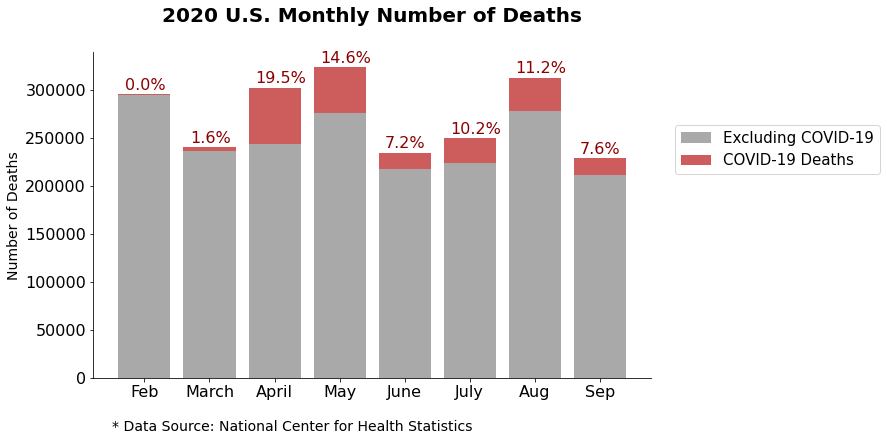

In [22]:
# Created a stacked bar chart

label = ['Feb','March','April','May','June','July','Aug','Sep']
y_value1 = no_covid
y_value2 = covid

fig, axs = plt.subplots(figsize=(10,6))

p1 = axs.bar(label, y_value1, color='darkgray')   
p2 = axs.bar(label, y_value2, bottom=y_value1, color='indianred')

axs.set_title("2020 U.S. Monthly Number of Deaths", fontsize=20, fontweight="bold", pad=30)   
axs.set_ylabel("Number of Deaths", fontsize=14)
axs.tick_params(labelsize=16)  
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.legend((p1[0],p2[0]),('Excluding COVID-19','COVID-19 Deaths'),bbox_to_anchor=(1.03,0.8),fontsize=15)

for i in range(len(percent)):
    plt.text(i-0.3, deaths[i] + 5000, percent[i], color='darkred', size=16)
plt.text(-0.5, -55000, "* Data Source: National Center for Health Statistics", fontsize=14)
plt.show() 